In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

# Normal Distribution


In [6]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

In [8]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

In [9]:
print("Mean Estimation")
print(normal_mu_MLE(X))
print(np.mean(X))
print("Standard Deviation Estimation")
print(normal_sigma_MLE(X))
print(np.std(X))

Mean Estimation
39.394366803094144
39.39436680309414
Standard Deviation Estimation
9.684988175694386
9.684988175694384


In [10]:
mu, std = scipy.stats.norm.fit(X)
print("mu estimate: " + str(mu))
print("std estimate: " + str(std))

mu estimate: 39.39436680309414
std estimate: 9.684988175694384


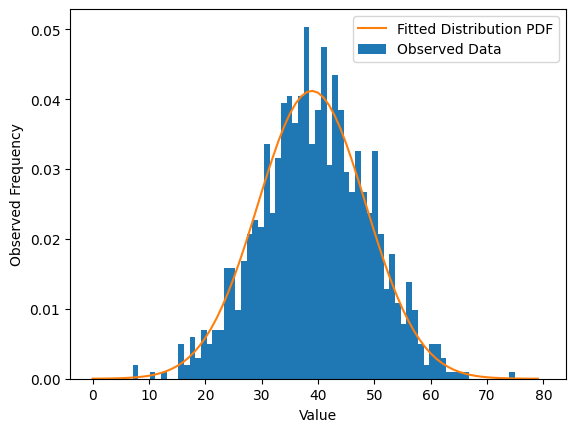

In [12]:
pdf = scipy.stats.norm.pdf
x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, density=True)
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

# Exponential Distribution

In [27]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

In [20]:
def exp_lamda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [24]:
print("lambda estimate: " + str(exp_lamda_MLE(X)))

lambda estimate: 4.937912409603818


In [25]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=0)

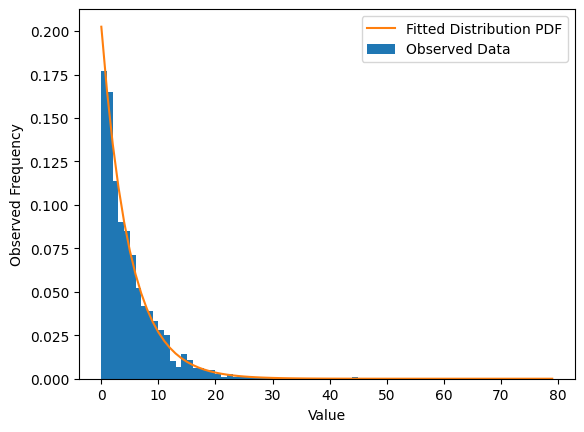

In [26]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
plt.hist(X, bins=x, density=True)
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Observed Frequency')
plt.legend(['Fitted Distribution PDF', 'Observed Data', ]);

# MLE for Asset Returns

In [ ]:
import yfinance as yf

prices = yf.download('TSLA',start='2014-01-01',end='2015-01-01',auto_adjust=True)['Close']['TSLA']
absolute_returns = np.diff(prices)
returns = absolute_returns/prices[:-1]

[*********************100%***********************]  1 of 1 completed


Date
2014-01-02   -0.003598
2014-01-03   -0.017117
2014-01-06    0.016054
2014-01-07    0.012855
2014-01-08   -0.024788
                ...   
2014-12-23    0.005838
2014-12-24    0.025016
2014-12-26   -0.009262
2014-12-29   -0.015418
2014-12-30    0.000810
Name: TSLA, Length: 251, dtype: float64

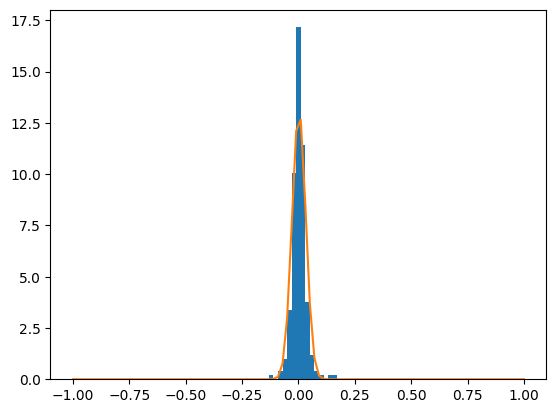

In [30]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, density=True)
l = plt.plot(x, pdf(x, loc=mu, scale=std))

In [31]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(returns)

(np.float64(249.43268824491162),
 np.float64(6.860881912969277e-55),
 np.float64(0.7513123088069728),
 np.float64(7.646746902938265))

In [32]:
jarque_bera(np.random.normal(0, 1, 100))

(np.float64(2.8647726278303365),
 np.float64(0.23873853686253782),
 np.float64(-0.3407807003998997),
 np.float64(3.4722493913379835))